# Project Part 3

In this four-part project, we will explore what features make a good cup of coffee using reviews gathered from the Coffee Quality Institute by Data Scientist James LeDoux.

Part 3 is a continuation of the **Unit 2: Synthesis Assignment**. Please review and correct any issues that might've been highlighted in previous parts before proceeding. Failure to do so may lead to compounding problems.

**By the end of this activity, you will:**

*   Conduct a linear model appropriate for your question using Statsmodels.
*   Use Statsmodels to check the assumptions for your model and correctly identify if assumptions are met.
*   Remediate your analysis if necessary.
*   Interpret a valid linear model, overall model, and each variable's significance.

**For full credit:**

- Only include libraries covered in this course and those you plan to use; don't include libraries you don't intend to use.
- Only include features relevant to your research question; don't include extraneous data and unnamed columns.
- Choose models and tests appropriate for the task.
- Remediate only when necessary.
- Interpret models that are valid and predictors that are significant.
- Accurately comment each code block and explain why steps were taken.

**Acknowledgements**

Coffee Quality Database courtesy of [James LeDoux](https://github.com/jldbc/coffee-quality-database), the [Coffee Quality Institute](https://database.coffeeinstitute.org/), and [TidyTuesday](https://github.com/rfordatascience/tidytuesday/tree/master/data/2020/2020-07-07).

## Data Dictionary

|variable              |class     |description |
|:---------------------|:---------|:-----------|
|total_cup_points      |double    | Total rating/points (0 - 100 scale) |
|species               |character | Species of coffee bean (arabica or robusta) |
|owner                 |character | Owner of the farm |
|country_of_origin     |character | Where the bean came from |
|farm_name             |character | Name of the farm |
|lot_number            |character | Lot number of the beans tested |
|mill                  |character | Mill where the beans were processed |
|ico_number            |character | International Coffee Organization number |
|company               |character | Company name |
|altitude              |character | Altitude |
|region                |character | Region where bean came from |
|producer              |character | Producer of the roasted bean |
|number_of_bags        |double    | Number of bags tested |
|bag_weight            |character | Bag weight tested |
|in_country_partner    |character | Partner for the country |
|harvest_year          |character | When the beans were harvested (year) |
|grading_date          |character | When the beans were graded|
|owner_1               |character | Who owns the beans|
|variety               |character | Variety of the beans |
|processing_method     |character | Method for processing|
|aroma                 |double    | Aroma grade * |
|flavor                |double    | Flavor grade * |
|aftertaste            |double    | Aftertaste grade * |
|acidity               |double    | Acidity grade  * |
|body                  |double    | Body grade * |
|balance               |double    | Balance grade * |
|uniformity            |double    | Uniformity grade * |
|clean_cup             |double    | Clean cup grade * |
|sweetness             |double    | Sweetness grade * |
|cupper_points         |double    | Cupper Points|
|moisture              |double    | Moisture Grade * |
|category_one_defects  |double    | Category one defects (count) * |
|quakers               |double    | quakers|
|color                 |character | Color of bean |
|category_two_defects  |double    |Category two defects (count) * |
|expiration            |character | Expiration date of the beans |
|certification_body    |character | Who certified it |
|certification_address |character | Certification body address |
|certification_contact |character | Certification contact |
|unit_of_measurement   |character | Unit of measurement |
|altitude_low_meters   |double    | Altitude low meters|
|altitude_high_meters  |double    | Altitude high meters |
|altitude_mean_meters  |double    | Altitude mean meters |

\* denotes **Quality Measures**

## Task 1: Reaffirm your research question

Review the research question you selected in **Unit 2 Synthesis Assignment**. Since you have already worked on your data, continuing with the same question is recommended. You are, however, free to change your question; keep in mind this will require additional work.

<br>

---

The research question I chose previously was to answer: Are there significant differences in coffees grown at different altitudes and/or different counties?




---



## Task 2:  Setup workspace

Import your altered project data from the end of the **Unit 2: Synthesis Assignment** and any libraries necessary to build and test statistical models. If you have selected a new research question, use the space below to download the dataset again and subset it by selecting only the features relevant to your research question.

In [11]:
#mount google drive
from google.colab import drive
drive.mount('/content/gdrive')
#importing libraries to build/ test stats models
import pandas as pd
import statsmodels.api as smapi
import statsmodels.formula.api as smf
import statsmodels.stats as stats
import matplotlib.pyplot as plt
#importing prior dataset
#note, I made some changes since part 2, so the additional columns "total cup points", "altitude_low_meters", "altitude_high_meters", and "altitude_mean_meters" are now included for analysis
Coffee_sub2 = pd.read_csv('/content/gdrive/MyDrive/Coffee_sub2.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [12]:
#data import check
Coffee_sub2.head()

,Unnamed: 0,total_cup_points,species,country_of_origin,altitude,region,number_of_bags,bag_weight,variety,aroma,...,balance,uniformity,sweetness,moisture,category_one_defects,color,category_two_defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,89.92,Arabica,Ethiopia,1950-2200,guji-hambela,300,60 kg,Other,8.75,...,8.42,10.0,10.0,0.12,0,Green,1,1950.0,2200.0,2075.0
1,4,88.83,Arabica,Ethiopia,1950-2200,guji-hambela,300,60 kg,Other,8.25,...,8.33,10.0,10.0,0.12,0,Green,2,1950.0,2200.0,2075.0
2,9,88.25,Arabica,Ethiopia,1795-1850,"snnp/kaffa zone,gimbowereda",50,60 kg,Other,8.08,...,8.42,10.0,10.0,0.10,0,Green,4,1795.0,1850.0,1822.5
3,18,87.25,Arabica,China,1450,yunnan,3,60 kg,Catimor,8.42,...,8.00,10.0,10.0,0.10,0,Green,0,1450.0,1450.0,1450.0
4,20,87.25,Arabica,United States,meters above sea level: 2.019,antioquia,10,1 kg,Other,8.00,...,8.00,10.0,10.0,0.00,0,None,0,2019.0,2019.0,2019.0


## Task 3: Model Building

Build a linear model appropriate for your research question using [Statsmodels](https://www.statsmodels.org).

In [21]:
#Since our research question is "Are there significant differences in coffees grown at different altitudes and/or different counties?", we're going to look first at "total_cup_points" as it is the 
#We're using total_cup_points as our response as it is the sum of quality measures for a particular observation
#OLS model
model = smf.ols(formula='total_cup_points ~ altitude_low_meters + altitude_high_meters + altitude_mean_meters + country_of_origin + region', data=Coffee_sub2)

In [22]:
Fit_model = model.fit()
Fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       total_cup_points   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                 -0.066
Method:                 Least Squares   F-statistic:                    0.8069
Date:                Thu, 06 Apr 2023   Prob (F-statistic):              0.982
Time:                        01:20:47   Log-Likelihood:                -2351.9
No. Observations:                 911   AIC:                             5288.
Df Residuals:                     619   BIC:                             6694.
Df Model:                         291                                         
Covariance Type:            nonrobust                                         
==================================================================================================================================================
                                                                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                         80.3968      0.477    168.469      0.000      79.460      81.334
country_of_origin[T.China]                                                         7.5677      5.113      1.480      0.139      -2.474      17.609
country_of_origin[T.Colombia]                                                      1.5717      1.009      1.558      0.120      -0.409       3.552
country_of_origin[T.Costa Rica]                                                    0.1908      4.668      0.041      0.967      -8.976       9.357
country_of_origin[T.El Salvador]                                                   1.5715      1.244      1.263      0.207      -0.872       4.015
country_of_origin[T.Ethiopia]                                                      4.4022      1.282      3.435      0.001       1.885       6.919
country_of_origin[T.Guatemala]                                                     4.6716      2.057      2.271      0.024       0.632       8.712
country_of_origin[T.Haiti]                                                        -1.9108      1.587     -1.204      0.229      -5.028       1.206
country_of_origin[T.Honduras]                                                      4.4256      3.142      1.409      0.159      -1.745      10.596
country_of_origin[T.India]                                                         0.8254      1.375      0.600      0.549      -1.876       3.526
country_of_origin[T.Indonesia]                                                     1.6839      1.094      1.539      0.124      -0.464       3.832
country_of_origin[T.Japan]                                                         2.1373      1.930      1.107      0.269      -1.654       5.928
country_of_origin[T.Kenya]                                                         3.4844      1.067      3.267      0.001       1.390       5.579
country_of_origin[T.Laos]                                                          0.9919      1.589      0.624      0.533      -2.129       4.113
country_of_origin[T.Malawi]                                                        0.8669      1.264      0.686      0.493      -1.616       3.350
country_of_origin[T.Mexico]                                                       -0.1872      0.691     -0.271      0.786      -1.543       1.169
country_of_origin[T.Myanmar]                                                       0.2190      1.376      0.159      0.874      -2.484       2.922
country_of_origin[T.Nicaragua]                                                    -3.2029      3.377     -0.948      0.343      -9.835       3.

In [20]:
#Now a Type III One-Way ANOVA model
smapi.stats.anova_lm(Fit_model, typ=3)

,sum_sq,df,F,PR(>F)
Intercept,427389.745176,1.0,28381.696954,0.000000e+00
country_of_origin,1326.681996,28.0,3.146466,1.626378e-07
region,42594.350870,284.0,9.959738,1.962284e-123
altitude_low_meters,13.172629,1.0,0.874756,3.500068e-01
altitude_high_meters,13.095835,1.0,0.869656,3.514142e-01
altitude_mean_meters,4.477769,1.0,0.297355,5.857415e-01
Residual,9321.297902,619.0,NaN,NaN


## Part 4: Assumption Checking

Check the assumptions for your model.

In [25]:
#Anderson Darling test for normality
stats.diagnostic.normal_ad(Fit_model.resid_pearson)
#AD test stat = 104.46, p-value = approx 0.0
#We have a violation of the normality assumption

(104.45679480891454, 0.0)

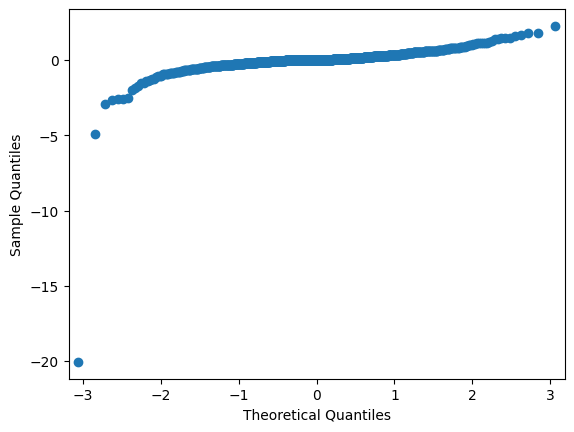

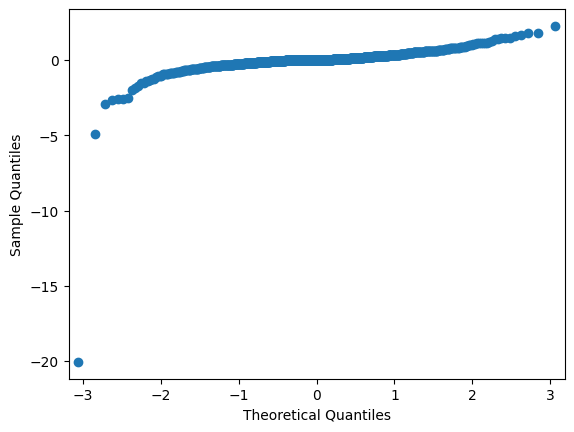

In [26]:
#Normal probability plot
smapi.qqplot(Fit_model.resid_pearson)
#We can clearly see the violation in the figures below

In [28]:
#Breusch-Pagan test for equal variance
stats.diagnostic.het_breuschpagan(Fit_model.resid_pearson, Fit_model.model.exog)
#the p-values here are large enough that we don't have evidence of an equal variance violation 

(60.191968097541384, 1.0, 0.1504889536632287, 0.9999999999999999)

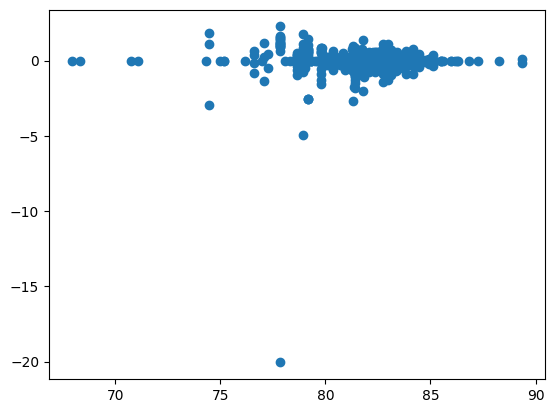

In [30]:
#residual plot
plt.scatter(Fit_model.fittedvalues, Fit_model.resid_pearson)
#barring the outlier, it does appear to be a random spread

**Summarize**

> *Report the test statistics, p-values, and correctly identify if the assumptions are met.*

The Anderson Darling test yields the test statistic of 104.46 and a p-value = 0.0. Testing at the 0.05 significance level, we reject the null hypothesis as there is sufficient evidence the errors are non-normal. The Breusch-Pagan test for equal error varaince yields the lagrange multiplier of 60.19 and the corresponding p-value = 1.0 so we fail to reject the null, at significance level 0.05, as there is in sufficient evidence of heteroscedasticity. The normality deviation will need to be remedied.


## Part 4: Remediation & Testing

Remediate if necessary and explain why steps were taken.

If no remediation is necessary please state your reasoning.

*If a model is remediated and should not be, this portion may be marked incorrect.*

Firstly, we need to address the normality issue as was clearly present in the normal probability plot.

In [31]:
#Box-Cox transformation to fix (lack of) normality
from scipy import stats as bc
Coffee_sub2['total_cup_points_BC'], _ = bc.boxcox(Coffee_sub2['total_cup_points'] + .0001) #the 0.0001 addition helps it so that we don't encounter log(0) transformation errors

<Axes: >

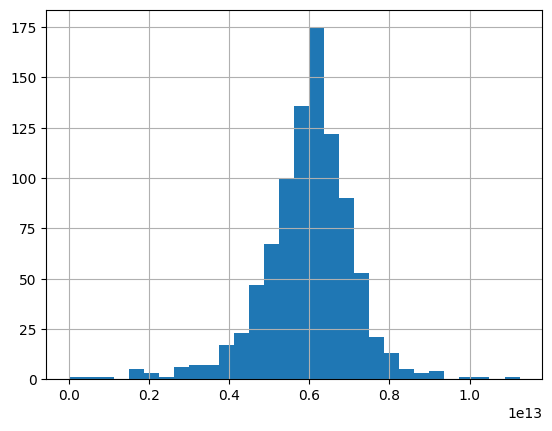

In [33]:
Coffee_sub2['total_cup_points_BC'].hist(bins = 30)
#histogram of our transformed response

<Axes: >

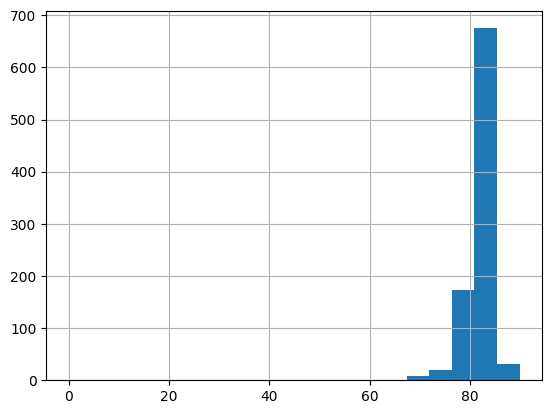

In [36]:
#let's compare with what we had before
Coffee_sub2['total_cup_points'].hist(bins = 20)

In [38]:
#rechecking the model with this transformation
model2 = smf.ols(formula='total_cup_points_BC ~ altitude_low_meters + altitude_high_meters + altitude_mean_meters + country_of_origin + region', data=Coffee_sub2)
Fit_model2 = model2.fit()
Fit_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     total_cup_points_BC   R-squared:                       0.549
Model:                             OLS   Adj. R-squared:                  0.337
Method:                  Least Squares   F-statistic:                     2.590
Date:                 Thu, 06 Apr 2023   Prob (F-statistic):           2.99e-23
Time:                         01:59:03   Log-Likelihood:                -26229.
No. Observations:                  911   AIC:                         5.304e+04
Df Residuals:                      619   BIC:                         5.445e+04
Df Model:                          291                                         
Covariance Type:             nonrobust                                         
==================================================================================================================================================
                                                                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                       6.086e+12   1.15e+11     52.839      0.000    5.86e+12    6.31e+12
country_of_origin[T.China]                                                      2.221e+12   1.23e+12      1.800      0.072   -2.02e+11    4.64e+12
country_of_origin[T.Colombia]                                                  -1.133e+11   2.43e+11     -0.465      0.642   -5.91e+11    3.65e+11
country_of_origin[T.Costa Rica]                                                -1.723e+11   1.13e+12     -0.153      0.878   -2.38e+12    2.04e+12
country_of_origin[T.El Salvador]                                               -2.329e+09      3e+11     -0.008      0.994   -5.92e+11    5.87e+11
country_of_origin[T.Ethiopia]                                                   1.701e+12   3.09e+11      5.498      0.000    1.09e+12    2.31e+12
country_of_origin[T.Guatemala]                                                  1.499e+12   4.97e+11      3.019      0.003    5.24e+11    2.47e+12
country_of_origin[T.Haiti]                                                      -1.19e+12   3.83e+11     -3.106      0.002   -1.94e+12   -4.37e+11
country_of_origin[T.Honduras]                                                   1.356e+12   7.58e+11      1.788      0.074   -1.34e+11    2.84e+12
country_of_origin[T.India]                                                      -1.11e+11   3.32e+11     -0.334      0.738   -7.63e+11    5.41e+11
country_of_origin[T.Indonesia]                                                  1.294e+09   2.64e+11      0.005      0.996   -5.17e+11     5.2e+11
country_of_origin[T.Japan]                                                      6.224e+11   4.66e+11      1.336      0.182   -2.93e+11    1.54e+12
country_of_origin[T.Kenya]                                                      9.925e+11   2.57e+11      3.855      0.000    4.87e+11     1.5e+12
country_of_origin[T.Laos]                                                          -2e+11   3.84e+11     -0.521      0.602   -9.53e+11    5.53e+11
country_of_origin[T.Malawi]                                                    -3.497e+11   3.05e+11     -1.146      0.252   -9.49e+11     2.5e+11
country_of_origin[T.Mexico]                                                     -9.15e+11   1.67e+11     -5.489      0.000   -1.24e+12   -5.88e+11
country_of_origin[T.Myanmar]                                                   -7.399e+11   3.32e+11     -2.227      0.026   -1.39e+12   -8.76e+10
country_of_origin[T.Nicaragua]                                                 -9.222e+11   8.15e+11     -1.131      0.258   -2.52e+

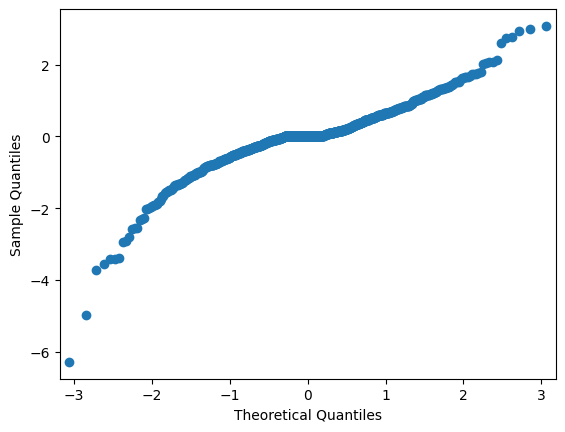

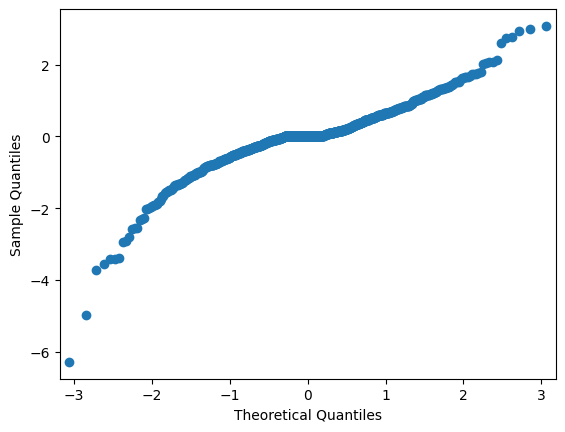

In [40]:
#rechecking normal probability plot
smapi.qqplot(Fit_model2.resid_pearson)
#it definitely looks better than it did, but we'll leave it up to the AD test to be sure

In [42]:
#Anderson Darling test
stats.diagnostic.normal_ad(Fit_model2.resid_pearson)
#it's definitely less bad now (with test stat = 24.90 and p-value = approx 0.0) but still not great

(24.89730335548063, 0.0)

In [45]:
#Since we're still having an issue, and we can clearly see that there are a couple outliers in our system, let's see if removing those will help
q_low = Coffee_sub2["total_cup_points"].quantile(0.01)
q_hi  = Coffee_sub2["total_cup_points"].quantile(0.99)
Coffee_sub3 = Coffee_sub2
Coffee_sub3 = Coffee_sub2[(Coffee_sub2["total_cup_points"] < q_hi) & (Coffee_sub2["total_cup_points"] > q_low)].copy()
Coffee_sub3['total_cup_points_BC'], _ = bc.boxcox(Coffee_sub3['total_cup_points'] + .0001)

In [46]:
#model recheck
model3 = smf.ols(formula='total_cup_points_BC ~ altitude_low_meters + altitude_high_meters + altitude_mean_meters + country_of_origin + region', data=Coffee_sub2)
Fit_model3 = model3.fit()
Fit_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     total_cup_points_BC   R-squared:                       0.549
Model:                             OLS   Adj. R-squared:                  0.337
Method:                  Least Squares   F-statistic:                     2.590
Date:                 Thu, 06 Apr 2023   Prob (F-statistic):           2.99e-23
Time:                         02:30:54   Log-Likelihood:                -26229.
No. Observations:                  911   AIC:                         5.304e+04
Df Residuals:                      619   BIC:                         5.445e+04
Df Model:                          291                                         
Covariance Type:             nonrobust                                         
==================================================================================================================================================
                                                                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                       6.086e+12   1.15e+11     52.839      0.000    5.86e+12    6.31e+12
country_of_origin[T.China]                                                      2.221e+12   1.23e+12      1.800      0.072   -2.02e+11    4.64e+12
country_of_origin[T.Colombia]                                                  -1.133e+11   2.43e+11     -0.465      0.642   -5.91e+11    3.65e+11
country_of_origin[T.Costa Rica]                                                -1.723e+11   1.13e+12     -0.153      0.878   -2.38e+12    2.04e+12
country_of_origin[T.El Salvador]                                               -2.329e+09      3e+11     -0.008      0.994   -5.92e+11    5.87e+11
country_of_origin[T.Ethiopia]                                                   1.701e+12   3.09e+11      5.498      0.000    1.09e+12    2.31e+12
country_of_origin[T.Guatemala]                                                  1.499e+12   4.97e+11      3.019      0.003    5.24e+11    2.47e+12
country_of_origin[T.Haiti]                                                      -1.19e+12   3.83e+11     -3.106      0.002   -1.94e+12   -4.37e+11
country_of_origin[T.Honduras]                                                   1.356e+12   7.58e+11      1.788      0.074   -1.34e+11    2.84e+12
country_of_origin[T.India]                                                      -1.11e+11   3.32e+11     -0.334      0.738   -7.63e+11    5.41e+11
country_of_origin[T.Indonesia]                                                  1.294e+09   2.64e+11      0.005      0.996   -5.17e+11     5.2e+11
country_of_origin[T.Japan]                                                      6.224e+11   4.66e+11      1.336      0.182   -2.93e+11    1.54e+12
country_of_origin[T.Kenya]                                                      9.925e+11   2.57e+11      3.855      0.000    4.87e+11     1.5e+12
country_of_origin[T.Laos]                                                          -2e+11   3.84e+11     -0.521      0.602   -9.53e+11    5.53e+11
country_of_origin[T.Malawi]                                                    -3.497e+11   3.05e+11     -1.146      0.252   -9.49e+11     2.5e+11
country_of_origin[T.Mexico]                                                     -9.15e+11   1.67e+11     -5.489      0.000   -1.24e+12   -5.88e+11
country_of_origin[T.Myanmar]                                                   -7.399e+11   3.32e+11     -2.227      0.026   -1.39e+12   -8.76e+10
country_of_origin[T.Nicaragua]                                                 -9.222e+11   8.15e+11     -1.131      0.258   -2.52e+

In [49]:
#Last normality check
stats.diagnostic.normal_ad(Fit_model3.resid_pearson)
#unfortunately this didn't do anything to help our normality issue

(24.89730335548063, 0.0)

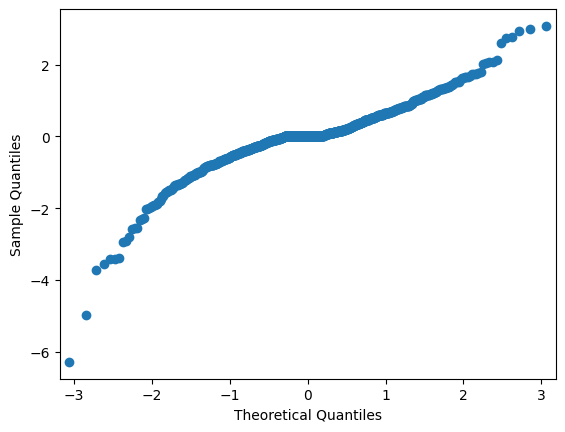

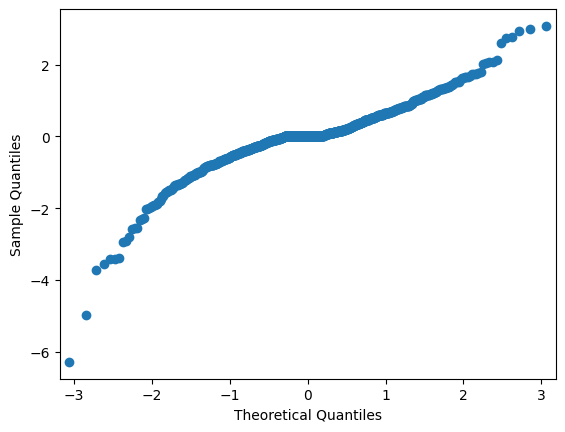

In [48]:
smapi.qqplot(Fit_model3.resid_pearson)

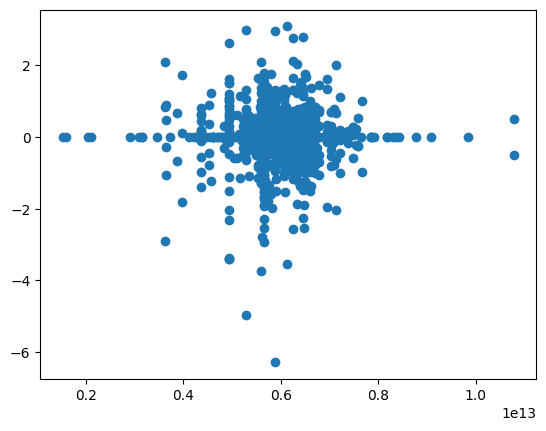

In [51]:
plt.scatter(Fit_model3.fittedvalues, Fit_model3.resid_pearson)
#it did help our variance plot though

In [53]:
#rechecking Breusch-Pagan test
stats.diagnostic.het_breuschpagan(Fit_model3.resid_pearson, Fit_model3.model.exog)
#it's still relatively the same

(184.51049226043784, 0.999999999577538, 0.54024328953647, 0.9999999976251027)

In [54]:
#One Way ANOVA
smapi.stats.anova_lm(Fit_model3, typ=3)

,sum_sq,df,F,PR(>F)
Intercept,2.449080e+27,1.0,2791.932080,1.423275e-231
country_of_origin,1.826097e+26,28.0,7.434772,1.023536e-24
region,8.277023e+26,284.0,3.322445,9.929632e-36
altitude_low_meters,1.526715e+24,1.0,1.740444,1.875704e-01
altitude_high_meters,1.512666e+24,1.0,1.724428,1.896106e-01
altitude_mean_meters,1.314345e+24,1.0,1.498343,2.213922e-01
Residual,5.429861e+26,619.0,NaN,NaN


## Task 5: Conclusions

Interpret the validity of your model, the overall model's significance, and each variable's significance where appropriate.

*This portion may be marked incorrect if an invalid model and/or non-significant predictor variable is interpreted.*

Overall, our model is ok but not great. We do have a glaring normality problem that affects the significance of the results. Looking at the OLS model table, we do even still have some predictor values that appear to be significant. Approaching with scepticism, we do see that in our model so far, the following countries are significant predictors: Ethiopia, Guatemala, Kenya, Mexico, Myanmar, Peru, Uganda, and the United States. Out of curiosity, we did add region as a predictor as well and found a number of regions that were significant predictors. Interestingly though, the altitude values were all deemed as insignificant predictors in our OLS model. Referencing the One-Way ANOVA model output, we found similar results. As a whole, country_of_origin and region were found to be significant predictors at the 0.05 significance level, while altitude_low_meters, altitude_high_meters, altitude_mean_meters were not found to be significant.

## Task 6: Thought Question

> *How have the results helped respond to the initial question?  What might be a 'next step' if you pursued this question further?*

Dispute our model issues, our results do help identify the potential relationship between the country of origin and the overall quality of the coffee output. I think our next steps would include legitimately resolving the error normality issue and expanding the model further with predictors. We used total_cup_points as our response but we could explore whether there are certain quality measures that are more affected by the coffee's country of origin/ altitude. For example, we could look into wether coffee grown at higher altitudes is more bitter than those grown in low altitudes, or we could research if coffee grown in typically warmer countries like Guatemala as compared to typically colder countries.